Let's import the data first.

In [1]:
import pandas as pd 
import random
import matplotlib.pyplot as plt

training_data = pd.read_csv("TrainingSet.csv", index_col=0)
# print(training_data.shape)
# print(training_data.columns)
# print(training_data['Series Name'].value_counts())

submission_labels = pd.read_csv("SubmissionRows.csv", index_col=0)
# print(submission_labels.shape)

now that we have submission labels (tha rows of the time series that we need to predict), lets extract them into a separate df.

In [2]:
target = training_data.loc[submission_labels.index]
print(target['Series Code'].value_counts())
# print(target['Series Name'].value_counts())
# print(target['Country Name'].value_counts())
# print(training_data.columns)
print(training_data['Series Code'].value_counts()['8.16'])


8.16    200
4.1     192
7.8     154
6.1     105
2.1      81
5.1       4
6.7       1
Name: Series Code, dtype: int64
206


Usefull functions for croping the data by series_code (which is our label), and for sampling by country.  

In [3]:
def transpose_and_crop(data):
    croped_table = data[['1997 [YR1997]', '1998 [YR1998]', '1999 [YR1999]','2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]','2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', 'Country Name']]
    croped_table = pd.pivot_table(croped_table, columns = 'Country Name')
    return(croped_table)


def countries_at_random (data, number_of_countries):
    countries = random.sample(list(data['Country Name'].unique()), number_of_countries)
    condition = data['Country Name'].isin(countries)
    data_by_countries = data[condition]
    return(data_by_countries)


since 8.16 is most frequent in our target, let's see how those timeseries behave for a few countries. 

In [4]:
check_816 = training_data[training_data['Series Code'] == '8.16']
print(check_816.shape)
check_816 = transpose_and_crop(check_816)

(206, 39)


In [5]:
print(check_816.columns)


Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, RB', 'Vietnam',
       'Virgin Islands (U.S.)', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country Name', length=204)


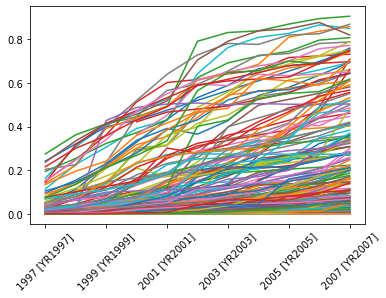

In [6]:
check_816.plot.line(legend = None)
plt.xticks(rotation = 45)
plt.show()


we can see here that there is no seasonality.  let's center every timeseries by subtracting the mean.

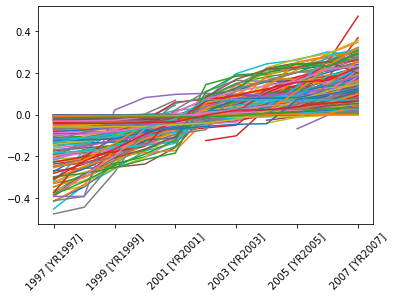

In [7]:
check_816 = check_816.subtract(check_816.mean())
check_816.plot.line(legend = None)
plt.xticks(rotation = 45)
plt.show()


there is a fair amount of states that have all zeroes (the midlle is thick). the next step would be to eliminate those that have a lot of zeroes and/or NAs. 

the same procedure should be repeated with all labels from the target: 
8.16    
4.1     
7.8    
6.1    
2.1    
5.1    
6.7    
and see if all of them follow a similar trend. (they do as far as I was able to see.)